# Amazon rekognition demo

## 1. Reconhecimento de Celebridades

### 1.1 Criar Bucket S3

In [106]:
import boto3
session = boto3.session.Session(profile_name='aws-ml-demo')
s3 = session.client('s3')
s3.create_bucket(Bucket='amazon-rekognition-demo')

{'ResponseMetadata': {'RequestId': 'DD34BC91B681306E',
  'HostId': '/V2pw+9FYpRwmS6WrNcg0lsTWd6+tWw6qrQjZJzaKsvXmK7G/LCpaFUpTcwIinBt/L2sE9TZlc0=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': '/V2pw+9FYpRwmS6WrNcg0lsTWd6+tWw6qrQjZJzaKsvXmK7G/LCpaFUpTcwIinBt/L2sE9TZlc0=',
   'x-amz-request-id': 'DD34BC91B681306E',
   'date': 'Wed, 16 Oct 2019 16:20:22 GMT',
   'location': '/amazon-rekognition-demo',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'Location': '/amazon-rekognition-demo'}

### 1.2 Enviar Imagens para S3

In [107]:
!aws s3 sync --profile aws-ml-demo ./flamengo/ s3://amazon-rekognition-demo/flamengo/

upload: flamengo/3-objetos-gabigol-treino.jpg to s3://amazon-rekognition-demo/flamengo/3-objetos-gabigol-treino.jpg
upload: flamengo/1-celebridades-jesus.jpg to s3://amazon-rekognition-demo/flamengo/1-celebridades-jesus.jpg
upload: flamengo/4-objetos-maracana.jpg to s3://amazon-rekognition-demo/flamengo/4-objetos-maracana.jpg
upload: flamengo/.ipynb_checkpoints/4-objetos-maracana-checkpoint.jpg to s3://amazon-rekognition-demo/flamengo/.ipynb_checkpoints/4-objetos-maracana-checkpoint.jpg
upload: flamengo/5-faces-everton.jpg to s3://amazon-rekognition-demo/flamengo/5-faces-everton.jpg
upload: flamengo/2-celebridades-gabigol.jpg to s3://amazon-rekognition-demo/flamengo/2-celebridades-gabigol.jpg


### 1.3 Funcões

In [108]:
def rekognition_detect_faces(rekognition, name, bucket_name='amazon-rekognition-demo'):
    try:
        response = rekognition.detect_faces(
            Image={
                'S3Object': {
                    'Bucket': bucket_name,
                    'Name': name
                }
            },
            Attributes=['ALL', 'DEFAULT']
        )
    except Exception as e:
        print(e)
    return response

In [109]:
def rekognition_detect_labels(rekognition, name, bucket_name='amazon-rekognition-demo'):
    try:
        response = rekognition.detect_labels(
            Image={
                'S3Object': {
                    'Bucket': bucket_name,
                    'Name': name
                }
            }
        )
    except Exception as e:
        print(e)
    return response

In [110]:
def rekognition_recognize_celebrities(rekognition, name, bucket_name='amazon-rekognition-demo'):
    try:
        response = rekognition.recognize_celebrities(
            Image={
                'S3Object': {
                    'Bucket': bucket_name,
                    'Name': name
                }
            }
        )
    except Exception as e:
        print(e)
    return response

## Detecção de celebridades - Jorge Jesus

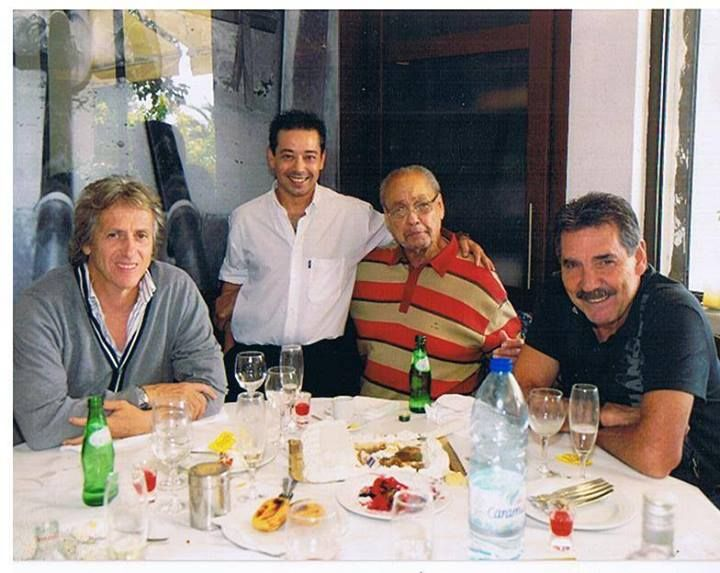

calling rekognition
Name: Jorge Jesus Confidence 99.98954772949219
Name: Mário Wilson Confidence 99.99805450439453

{
 "CelebrityFaces": [
  {
   "Urls": [],
   "Name": "Jorge Jesus",
   "Id": "3g8Hf7M",
   "Face": {
    "BoundingBox": {
     "Width": 0.11249999701976776,
     "Height": 0.14136125147342682,
     "Left": 0.1180555522441864,
     "Top": 0.3560209572315216
    },
    "Confidence": 99.98954772949219,
    "Landmarks": [
     {
      "Type": "eyeLeft",
      "X": 0.15836839377880096,
      "Y": 0.41180312633514404
     },
     {
      "Type": "eyeRight",
      "X": 0.1966276615858078,
      "Y": 0.41286706924438477
     },
     {
      "Type": "nose",
      "X": 0.18301688134670258,
      "Y": 0.44085806608200073
     },
     {
      "Type": "mouthLeft",
      "X": 0.16027581691741943,
      "Y": 0.45862653851509094
     },
     {
      "Type": "mouthRight",
      "X": 0.1916217803955078,
      "Y": 0.46101313829421997
     }
    ],
    "Pose": {
     "Roll": -0.292199134826

In [111]:
from IPython.display import display, Image
import json

path = 'flamengo/1-celebridades-jesus.jpg'
img = Image(path)
display(img)

rekognition = session.client('rekognition')
print('calling rekognition')
response = rekognition_recognize_celebrities(rekognition, name=path)
for r in response['CelebrityFaces']:
    print('Name: {} Confidence {}'.format(r['Name'], r['Face']['Confidence']))

print()
print(json.dumps(response, indent=1))

## Detecção de celebridades - Gabigol

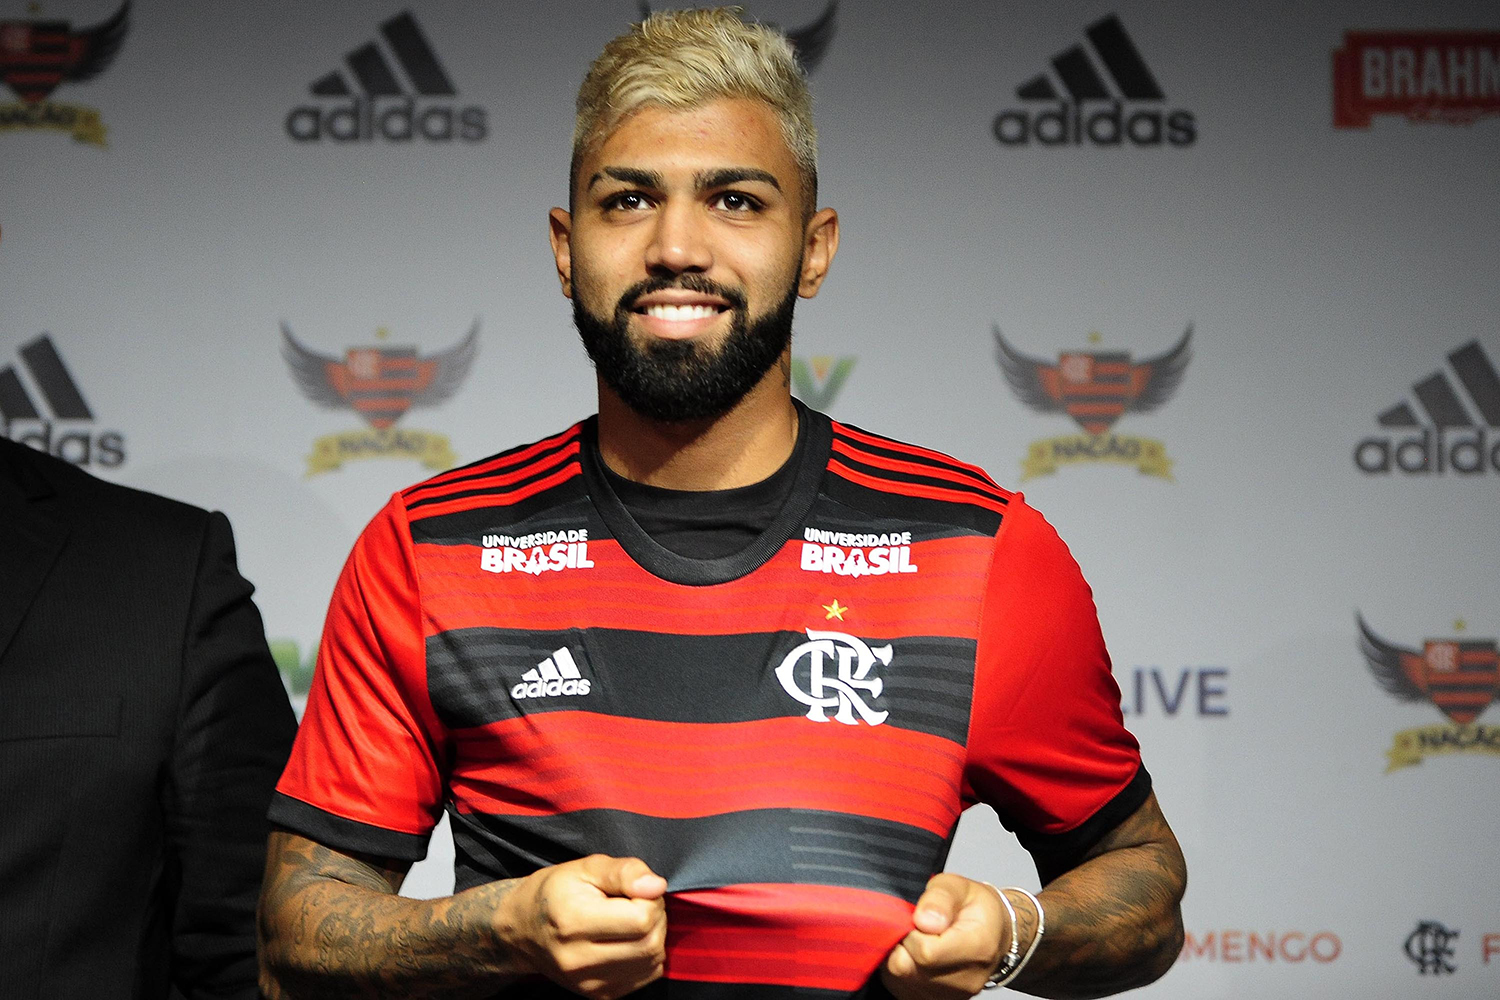

calling rekognition
Name: Gabriel Barbosa Confidence 99.9892349243164

{
 "CelebrityFaces": [
  {
   "Urls": [],
   "Name": "Gabriel Barbosa",
   "Id": "4rR3Tp9C",
   "Face": {
    "BoundingBox": {
     "Width": 0.21199999749660492,
     "Height": 0.3179999887943268,
     "Left": 0.3479999899864197,
     "Top": 0.0820000022649765
    },
    "Confidence": 99.9892349243164,
    "Landmarks": [
     {
      "Type": "eyeLeft",
      "X": 0.4197440445423126,
      "Y": 0.20221520960330963
     },
     {
      "Type": "eyeRight",
      "X": 0.48877978324890137,
      "Y": 0.20229099690914154
     },
     {
      "Type": "nose",
      "X": 0.44977909326553345,
      "Y": 0.24923333525657654
     },
     {
      "Type": "mouthLeft",
      "X": 0.42056095600128174,
      "Y": 0.30743131041526794
     },
     {
      "Type": "mouthRight",
      "X": 0.48749223351478577,
      "Y": 0.3051774501800537
     }
    ],
    "Pose": {
     "Roll": 0.04788488149642944,
     "Yaw": -5.511386871337891,
    

In [112]:
path = 'flamengo/2-celebridades-gabigol.jpg'
img = Image(path)
display(img)

rekognition = session.client('rekognition')
print('calling rekognition')
response = rekognition_recognize_celebrities(rekognition, name=path)
for r in response['CelebrityFaces']:
    print('Name: {} Confidence {}'.format(r['Name'], r['Face']['Confidence']))

print()
print(json.dumps(response, indent=1))

## Detecção de objetos - Gabigol Treino

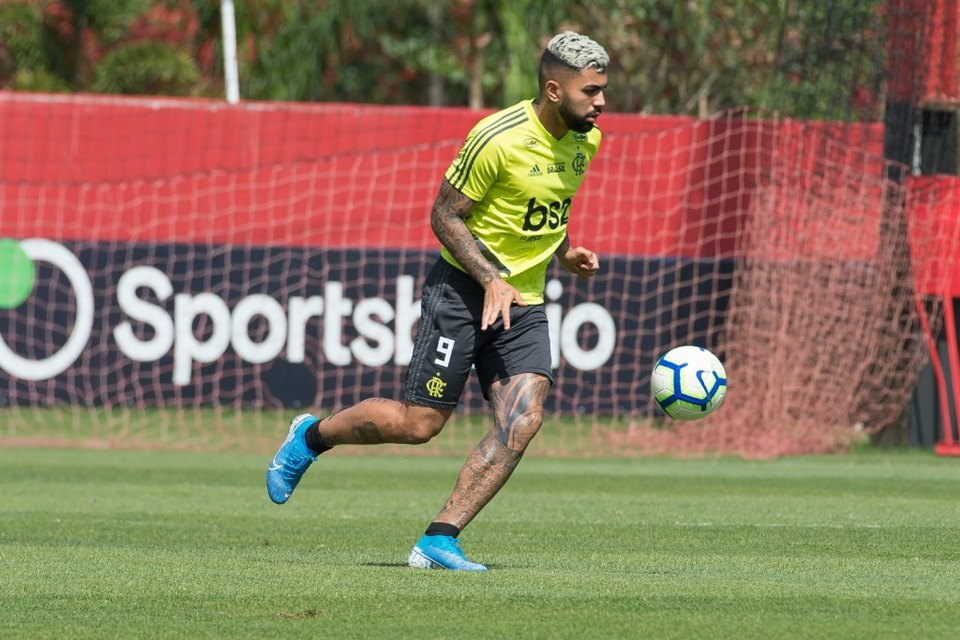

calling rekognition


In [ ]:
path = 'flamengo/3-objetos-gabigol-treino.jpg'
img = Image(path)
display(img)

rekognition = session.client('rekognition')
print('calling rekognition')
response = rekognition_detect_labels(rekognition, name=path)
for r in response['Labels']:
     print('Name: {} Confidence {}'.format(r['Name'], r['Confidence']))

print()
print(json.dumps(response, indent=1))

## Detecção de objetos - Maracana

In [ ]:
path = 'flamengo/4-objetos-maracana.jpg'
img = Image(path)
display(img)

rekognition = session.client('rekognition')
print('calling rekognition')
response = rekognition_detect_labels(rekognition, name=path)
for r in response['Labels']:
     print('Name: {} Confidence {}'.format(r['Name'], r['Confidence']))

print()
print(json.dumps(response, indent=1))

## Detecção de faces - Everton

In [ ]:
path = 'flamengo/5-faces-everton.jpg'
img = Image(path)
display(img)

rekognition = session.client('rekognition')
print('calling rekognition')
response = rekognition_detect_faces(rekognition, name=path)
for r in response['FaceDetails']:
    for e in r['Emotions']:
        print('Type: {} Confidence {}'.format(e['Type'], e['Confidence']))
print()
print(json.dumps(response, indent=1))